# Ejercicio masa/resorte/amortiguador
Lo primero en Python es importar los módulos que utilizaremos.

In [39]:
import numpy as np #Módulo para hacer operaciones matematicas con matrices.
from scipy import signal # Módulo LTI.
import matplotlib # graficar

Luego definiremos los valores de las constantes y de las matrices de la representación en espacio de estados.

In [40]:
m=10.
k=1.
b=0.5
A=np.array([ [-b/m,-k/m],[1.,0.] ])
B=np.array([[1/m],[0]])
C=np.array([[0,1]])
D=np.array([[0]])

en Matlab se usa ss, en python:

In [41]:
sys=signal.lti(A,B,C,D)

print(sys)

StateSpaceContinuous(
array([[-0.05, -0.1 ],
       [ 1.  ,  0.  ]]),
array([[0.1],
       [0. ]]),
array([[0, 1]]),
array([[0]]),
dt: None
)


In [42]:
sys2=signal.cont2discrete((A,B,C,D),0.1)

In [ ]:
print(sys2) #sys2 NO ES UNA VARIABLE DE SISTEMA DISCRETO
print(sys2)

(array([[ 0.99451418, -0.00997338],
       [ 0.09973379,  0.99950087]]), array([[0.00997338],
       [0.00049913]]), array([[0, 1]]), array([[0]]), 0.1)
[[0]]


In [ ]:
Ad=np.array([[ 0.99451418, -0.00997338],[ 0.09973379,  0.99950087]])
Bd=np.array([[0.00997338],[0.00049913]])


In [ ]:
sys2d=signal.dlti(Ad,Bd,C,D,dt=0.1)

In [ ]:
print(sys2d)
t3,y3=sys2d.step()

StateSpaceDiscrete(
array([[ 0.99451418, -0.00997338],
       [ 0.09973379,  0.99950087]]),
array([[0.00997338],
       [0.00049913]]),
array([[0, 1]]),
array([[0]]),
dt: 0.1
)


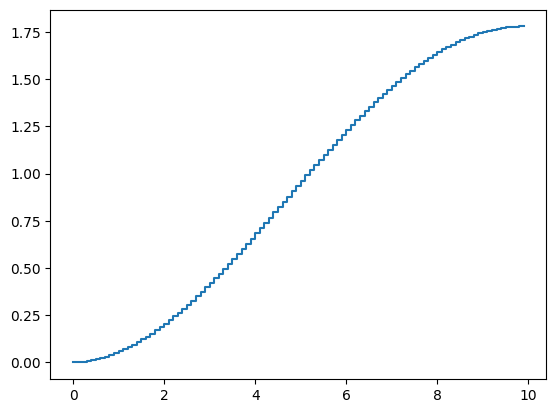

In [ ]:
matplotlib.pyplot.step(t3,np.squeeze(y3))

In [43]:
sysd=signal.TransferFunction(sys,dt=0.1)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [44]:
print(sysd)

TransferFunctionContinuous(
array([0.1]),
array([1.  , 0.05, 0.1 ]),
dt: None
)


In [ ]:
td,yd=sysd.step()

In [ ]:
t,y=sys.step()

In [ ]:
t,y=signal.step(sys,T=np.linspace(0,300,num=1000))

In [ ]:
u1=np.heaviside(t,1.0)

In [ ]:
print(t.shape)
print(y.shape)
print(u1.shape)

(1000,)
(1000,)
(1000,)


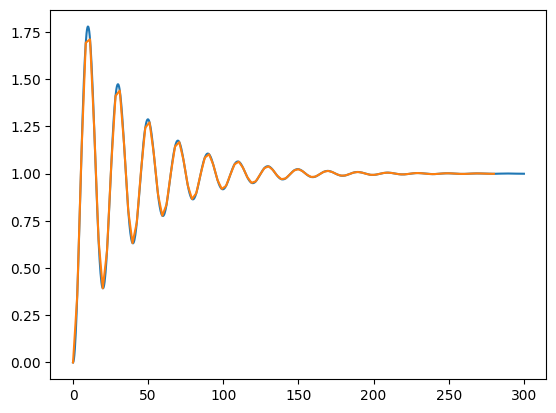

In [ ]:
matplotlib.pyplot.plot(t,y,td,yd)

In [ ]:
print(t.shape)

(100,)


In [ ]:
y.max()

1.779345564552667

In [ ]:
u10=np.heaviside(t,1.0)*10

In [ ]:
t, y2, x2= signal.lsim(sys,u10,t)

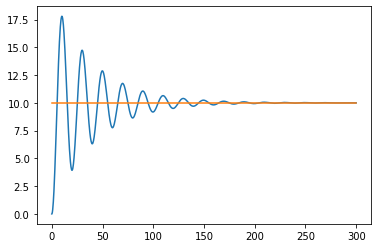

In [ ]:
matplotlib.pyplot.plot(t,y2,t,u10)